<a href="https://colab.research.google.com/github/Uyanhewajanadhi/ML_assignmnet/blob/main/18000088.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Index Number : 18000088***

***Assignment 1_Multivariate Linear Regression.***

Multivariate Linear Regression Assignmnet - 18000088

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import HTML

Get the data set from GitHub Repo. to Colab

In [ ]:
#import data set from the github repo
data = pd.read_csv('https://raw.githubusercontent.com/Uyanhewajanadhi/ML_assignmnet/main/ENB2012_data_1_.csv', delimiter=',')

In [ ]:
print(data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84
..    ...    ...    ...     ...  ...  ..  ...  ..    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64

[768 rows x 9 columns]


Standardize the data to be between 0 and 1

In [ ]:
#standardize the data between 0 and 1
data_cal = (data - np.min(data)) / (np.max(data) - np.min(data))
data_arr = data_cal.values
print(data_arr)

[[1.         0.         0.28571429 ... 0.         0.         0.25721219]
 [1.         0.         0.28571429 ... 0.         0.         0.25721219]
 [1.         0.         0.28571429 ... 0.         0.         0.25721219]
 ...
 [0.         1.         0.71428571 ... 1.         1.         0.28120787]
 [0.         1.         0.71428571 ... 1.         1.         0.28228633]
 [0.         1.         0.71428571 ... 1.         1.         0.28660016]]


Split the standardized dataset as data and target sets

In [ ]:
#split data (x values) and target (y values)
data_in= data_arr[:,1:7]
target_set = data_arr[:,8]


print (data_in, target_set)

[[0.         0.28571429 0.         1.         0.         0.        ]
 [0.         0.28571429 0.         1.         0.33333333 0.        ]
 [0.         0.28571429 0.         1.         0.66666667 0.        ]
 ...
 [1.         0.71428571 1.         0.         0.33333333 1.        ]
 [1.         0.71428571 1.         0.         0.66666667 1.        ]
 [1.         0.71428571 1.         0.         1.         1.        ]] [2.57212187e-01 2.57212187e-01 2.57212187e-01 2.57212187e-01
 3.99838231e-01 4.16554327e-01 3.96333243e-01 3.68562955e-01
 3.63709895e-01 3.75842545e-01 3.59396064e-01 3.31625775e-01
 2.97654354e-01 3.07360475e-01 2.94958210e-01 2.68805608e-01
 6.06902130e-01 6.44108924e-01 6.36829334e-01 6.13103262e-01
 5.05796711e-01 4.83149097e-01 5.05796711e-01 4.83149097e-01
 1.61768671e-03 1.07845781e-03 0.00000000e+00 8.08843354e-04
 9.70612025e-03 1.05149636e-02 9.59827447e-03 1.05149636e-02
 2.26476139e-02 2.10299272e-02 2.04906983e-02 2.15691561e-02
 3.15448908e-02 2.93879752e-02 

Split the standardized data into train and test sets

In [ ]:
#split the data set into train and test 
from sklearn.model_selection import train_test_split

train_data_set, test_data_set, train_target_set, test_target_set = train_test_split(data_arr, target_set, test_size=0.30)

Define Hyperparameters

In [ ]:
#hyperparamters
learning_rate = 0.001
initial_theta = [] #an empty array at the beginning
for i in range(9):
  initial_theta.append(random.uniform(0.0, 100.0))
num_iterations = 1000
initial_theta

[71.93383923120633,
 13.43110087722289,
 76.41197879102913,
 42.555818595332504,
 75.29806157338766,
 71.42535704572872,
 38.29503095713537,
 35.71024396174069,
 66.7205216628756]

Define the cost function

In [ ]:
def compute_cost(theta_set, data_in, target_set):
    total_cost = 0
    
    # number of datapoints in training data
    N = float(len(target_set))
    
    # Compute sum of squared errors
    for i in range(len(target_set)):
        estim_value = theta_set[0]
        for j in range (1,len(theta_set)):
          estim_value += data_in[i, j-1]*theta_set[j]
        total_cost += (target_set[i] - estim_value) ** 2
        
    # Return average of squared error
    return total_cost/(2*N)

Define Gradient Descent Functions

In [ ]:
def step_gradient(current_theta, data_in, target_set, alpha):
    
    theta_gradient = np.zeros(9)
    N = float(len(target_set))

    # Calculate Gradient
    for i in range(len(target_set)):
        estim_value = current_theta[0]
        for j in range (1,len(current_theta)):
          estim_value += data_in[i, j-1]*current_theta[j]
        theta_gradient[0] += - (2/N) * (target_set[i] - estim_value)
        for j in range (1, len(theta_gradient)):
          theta_gradient[j] += - (2/N) * data_in[i, j-1] * (target_set[i] - estim_value)
    
    # Update current theta
    updated_theta = np.zeros(9)
    for j in range (0,len(current_theta)):
      updated_theta[j] = current_theta[j] - alpha * theta_gradient[j]

    #Return updated parameters
    return updated_theta

In [ ]:
def gradient_descent(data_in, target_set, starting_theta, learning_rate, num_iterations):
    
    # initial values
    theta_set = []
    for i in starting_theta:
        theta_set.append(i)
    theta_set = np.array(theta_set)

    # to store the cost after each iteration
    cost_graph = []
    
    # to store the value of theta parameters after each iteration 
    theta_progress = [starting_theta]
    
    # For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(theta_set, data_in, target_set))
        theta_set = step_gradient(theta_set, data_in, target_set, learning_rate)
        theta_progress.append(theta_set)
        
    return [theta_set, cost_graph, theta_progress]

Run gradient_descent() to get optimized parameters b and m

In [ ]:
theta_set, cost_graph, theta_progress = gradient_descent(train_data_set, train_target_set, initial_theta, learning_rate, num_iterations)

#Print optimized parameters
for i in range(len(theta_set)):
  print("Optimized theta%d: %.4f" % (i, theta_set[i]))

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(theta_set, train_data_set, train_target_set))

Optimized theta0: -20.5081
Optimized theta1: -18.3263
Optimized theta2: 21.9357
Optimized theta3: -0.4742
Optimized theta4: 15.5881
Optimized theta5: 28.8444
Optimized theta6: -6.8794
Optimized theta7: -16.5465
Optimized theta8: 11.6209
Minimized cost: 49.675488932742994


Plotting the cost per iterations

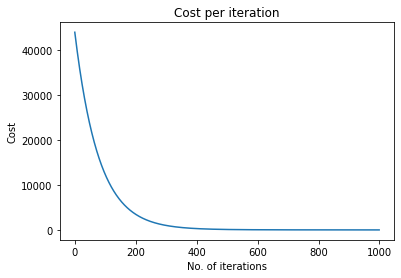

In [ ]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Prediction..

In [ ]:
def estim_values(theta_set, data_in):

  estim_target = []

  for i in range(len(data_in)):
    estim_value = theta_set[0]
    for j in range (1,len(theta_set)):
      estim_value += data_in[i, j-1]*theta_set[j]
    estim_target.append(estim_value)

  return estim_target 

estim_target = estim_values(theta_set, test_data_set)

print(estim_target)

[-1.376415977588989, -14.169070961602024, 2.55757590640338, -7.518155602520521, -5.193975786748748, -1.7776876969308066, 13.97773133523787, 17.943915905313553, -7.354676219200393, -8.682642570236098, 1.737558705378122, 4.104321973332359, -0.5555798289613509, 14.926577822669518, -1.3453746961566893, -7.982625196156718, 7.165062455761241, -10.037971394474505, 1.7475223791342724, -2.6412957270400614, -10.642093959243784, -20.40504974226024, -1.4074572590212924, -9.105774751635188, 3.580226222920208, 2.5886171878356814, -0.21625597856339773, 11.120233886310753, -0.2926917358177743, 5.479655301672487, -5.395224830192711, 0.6140766928509969, 5.97432832627274, 14.018230897006735, 4.634000856884493, -4.437156460017872, -4.8789688044967185, -1.344259384726909, 1.4651351753085553, -8.51243480822444, 16.582974013813395, -7.100525432266858, 1.8799604810220991, -4.600635843337999, -0.1279859849515379, 6.7514296180668785, 12.179265825498653, 4.943838285039756, 15.317090225642293, -2.5858302701572455